In [8]:
from qiskit import *
import numpy as np

In [9]:
def state_print(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit , simulator).result()
    statevector = result.get_statevector()
    print(statevector.to_dict())
    print("\n")

In [10]:
def initialize(qr, cr):
    circuit = QuantumCircuit(qr,cr)
    return circuit

In [11]:
import numpy as np

def psi_phi(circuit, psi, alpha, beta, phi=-1, gamma=1, delta=0):
    circuit.initialize([alpha, beta], psi)
    if phi != -1:
        circuit.initialize([gamma, delta], phi)


In [12]:
def swap_teleportation(circuit):

    circuit.h(1)
    circuit.h(4)
    # state_print(circuit)

    circuit.cx(1,3)
    circuit.cx(4,2)
    circuit.barrier()
    # state_print(circuit)

    circuit.swap(0,1)
    circuit.swap(4,5)
    # circuit.barrier()
    # state_print(circuit)

    circuit.cx(1,2)
    circuit.cx(4,3)
    # circuit.barrier()
    # state_print(circuit)

    circuit.h(1)
    circuit.h(4)
    circuit.barrier()
    #vector = state_print(circuit)

    circuit.measure(1,1)
    circuit.measure(2,2)
    circuit.measure(3,3)
    circuit.measure(4,4)
    circuit.barrier()
    # state_print(circuit)

    circuit.cx(2,5)
    circuit.cz(1,5)
    circuit.cx(3,0)
    circuit.cz(4,0)

    # circuit.measure(0,0)
    # circuit.measure(5,5)

In [13]:
from qiskit.tools.visualization import plot_histogram

def histogram(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=simulator).result()
    return result.get_counts(circuit)

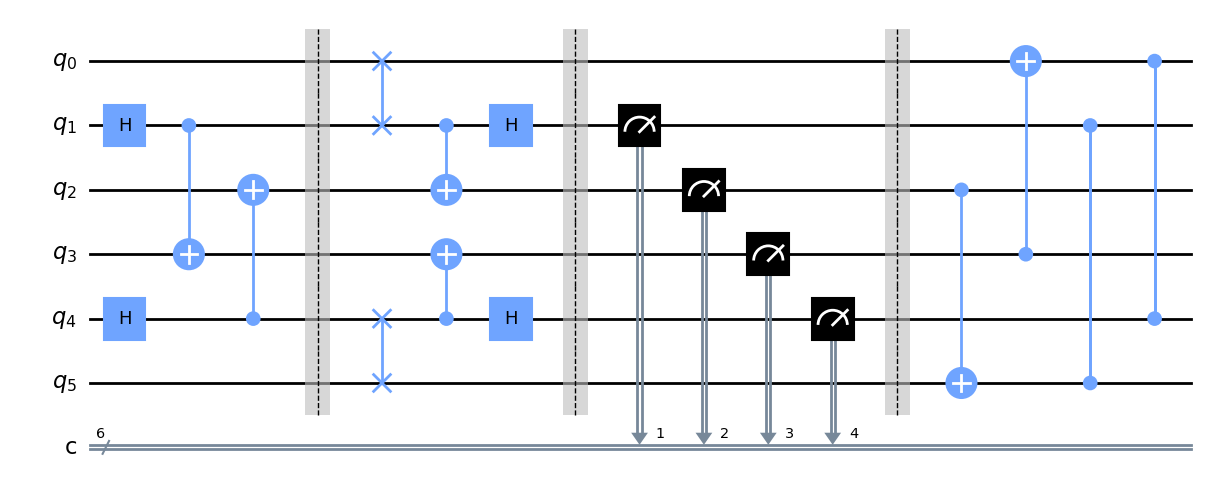

In [14]:
circuit = initialize(6,6)
# psi_phi(circuit, 0, 1, 0, 5, 0, 1)
swap_teleportation(circuit)

histogram(circuit)

circuit.draw(output="mpl")
# plot_histogram(histogram(circuit))